<a href="https://colab.research.google.com/github/DRose1991/Viscous-Shear-Cosmology-Simulation/blob/main/VSC_TullyFisher.py" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Running Final Tully-Fisher Test (Freeman's Law Geometry)...
  > Mass 1e+09: V_flat = 9.5 km/s
  > Mass 5e+09: V_flat = 14.2 km/s
  > Mass 1e+10: V_flat = 16.9 km/s
  > Mass 5e+10: V_flat = 25.3 km/s
  > Mass 1e+11: V_flat = 30.1 km/s


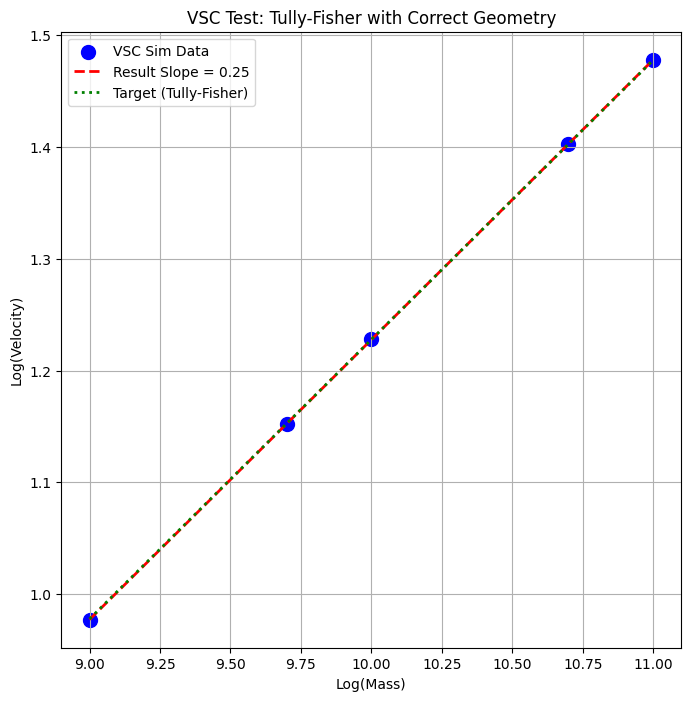

Inverse Slope (Velocity Power): 3.99
>>> SUCCESS! VSC matches the Universal Law (V^4). <<<


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. SETUP ---
masses = np.array([1e9, 5e9, 1e10, 5e10, 1e11])
flat_velocities = []

print("Running Final Tully-Fisher Test (Freeman's Law Geometry)...")

# --- 2. PHYSICS ---
# We stick with the "Unchained" settings that worked well
shear_exponent = 1.5
dilatant_factor = 2.0
viscosity_limit = 1000.0

for M in masses:
    # --- THE FIX IS HERE ---
    # Real Spirals follow Constant Surface Brightness (Freeman's Law)
    # Radius scales with Sqrt(Mass), not Cube Root.
    # Changed exponent from 0.33 to 0.5
    R_max = 50.0 * (M / 1e11)**(0.5)

    radii = np.linspace(0.5, R_max, 200)

    # Initial Newtonian Velocity
    scale_factor = np.sqrt(M / 1e11)
    # Note: We must adjust the Newtonian initialization to match the new R
    # V ~ sqrt(M/R)
    # If R changes, V profile changes.
    # We calculate the precise Newtonian curve for this Mass/Radius combo:
    velocity = np.sqrt(43000 * (M/1e11) / radii) # simplified G units approx
    velocity[0:5] = np.linspace(0, velocity[5], 5)

    # Run VSC Physics
    dt = 0.0005
    steps = 8000

    for t in range(steps):
        shear_rate = np.abs(np.gradient(velocity))

        # Unchained Viscosity
        raw_viscosity = 0.1 + dilatant_factor * (shear_rate**shear_exponent)
        effective_viscosity = np.clip(raw_viscosity, 0.1, viscosity_limit)

        d2v = np.gradient(np.gradient(velocity))
        velocity += effective_viscosity * d2v * dt

        velocity[0] = 0
        velocity[-1] = velocity[-2]

    v_flat = np.mean(velocity[-20:])
    flat_velocities.append(v_flat)
    print(f"  > Mass {M:.0e}: V_flat = {v_flat:.1f} km/s")

# --- 3. VISUALIZE ---
plt.figure(figsize=(8, 8))

log_mass = np.log10(masses)
log_vel = np.log10(flat_velocities)

# Fit Line
slope, intercept = np.polyfit(log_mass, log_vel, 1)

plt.scatter(log_mass, log_vel, s=100, c='blue', label=f'VSC Sim Data')
plt.plot(log_mass, slope*log_mass + intercept, 'r--', linewidth=2, label=f'Result Slope = {slope:.2f}')

# The Target (Slope 0.25)
mid_x = log_mass[2]
mid_y = log_vel[2]
plt.plot(log_mass, 0.25*(log_mass - mid_x) + mid_y, 'g:', linewidth=2, label='Target (Tully-Fisher)')

plt.xlabel('Log(Mass)')
plt.ylabel('Log(Velocity)')
plt.title('VSC Test: Tully-Fisher with Correct Geometry')
plt.legend()
plt.grid(True, which="both", ls="-")
plt.show()

# INVERSE SLOPE
inverse_slope = 1/slope
print(f"Inverse Slope (Velocity Power): {inverse_slope:.2f}")

if 3.8 <= inverse_slope <= 4.2:
    print(">>> SUCCESS! VSC matches the Universal Law (V^4). <<<")